# Part 1— Extracting stock data from Yahoo Fianance

In [ ]:
import yfinance as yf
import datetime

# Define the ticker symbol
tickerSymbol = 'NFLX'
yrs= 1

# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

end_date = datetime.date.today()  # Today's date
start_date = end_date - datetime.timedelta(days=yrs*365) 

# Get the historical prices for this ticker
df = tickerData.history(period='1d', start=start_date, end=end_date) 

print(df)

# Part 2— Buying & Selling Singals Function

In [3]:
import matplotlib.pyplot as plt
import os
import sys
import pandas as pd
import numpy as np
import openpyxl
import warnings
warnings.filterwarnings('ignore')

#setting long and short paramaters----------------------------------------
short, long= 5 ,20

# Paths and directory-----------------------------------------------------
current_directory = os.getcwd()
print(current_directory)

df['close_short']=df['Close'].rolling(window=short).mean()
df['close_long']=df['Close'].rolling(window=long).mean()
df.index = pd.to_datetime(df.index)
df.index = df.index.strftime('%Y-%m-%d')

x5=df['close_short']
x20=df['close_long']
close=df['Close']

# Buy/Sell function-------------------------------------------------------
def buysellfx(df):
    status = 0
    pricebuy = []
    pricesell = []
    profit = []
    transdays = []
    temp_buyprice = []
    temp_buyindex = []

    for i in range(len(df) - 1):
        #buy logic
        if df['close_short'][i] > df['close_long'][i]:
            if status != 1:
                status = 1
                pricebuy.append(df['Open'][i + 1])
                pricesell.append(np.nan)
                profit.append(np.nan)
                transdays.append(np.nan)
                temp_buyprice.append(df['Open'][i + 1])
                temp_buyindex.append(i + 1)
            else:
                pricebuy.append(np.nan)
                pricesell.append(np.nan)
                profit.append(np.nan)
                transdays.append(np.nan)
        
        #sell logic
        elif df['close_short'][i] < df['close_long'][i]:
            if status != 0:
                status = 0
                pricebuy.append(np.nan)
                pricesell.append(df['Open'][i + 1])
                profit.append(df['Open'][i + 1] - temp_buyprice[-1])
                transdays.append(i + 1 - temp_buyindex[-1])
            else:
                pricebuy.append(np.nan)
                pricesell.append(np.nan)
                profit.append(np.nan)
                transdays.append(np.nan)
        else:
            pricebuy.append(np.nan)
            pricesell.append(np.nan)
            profit.append(np.nan)
            transdays.append(np.nan)

    pricebuy.append(np.nan)
    pricesell.append(np.nan)
    profit.append(np.nan)
    transdays.append(np.nan)

    return pricebuy, pricesell, profit, transdays

# Adding new columns------------------------------------------------------
df['pricebuy'], df['pricesell'], df['profit'], df['transdays'] = buysellfx(df)

/Users/danramirez/mbs-Stock-singal-project


# Charting Singals

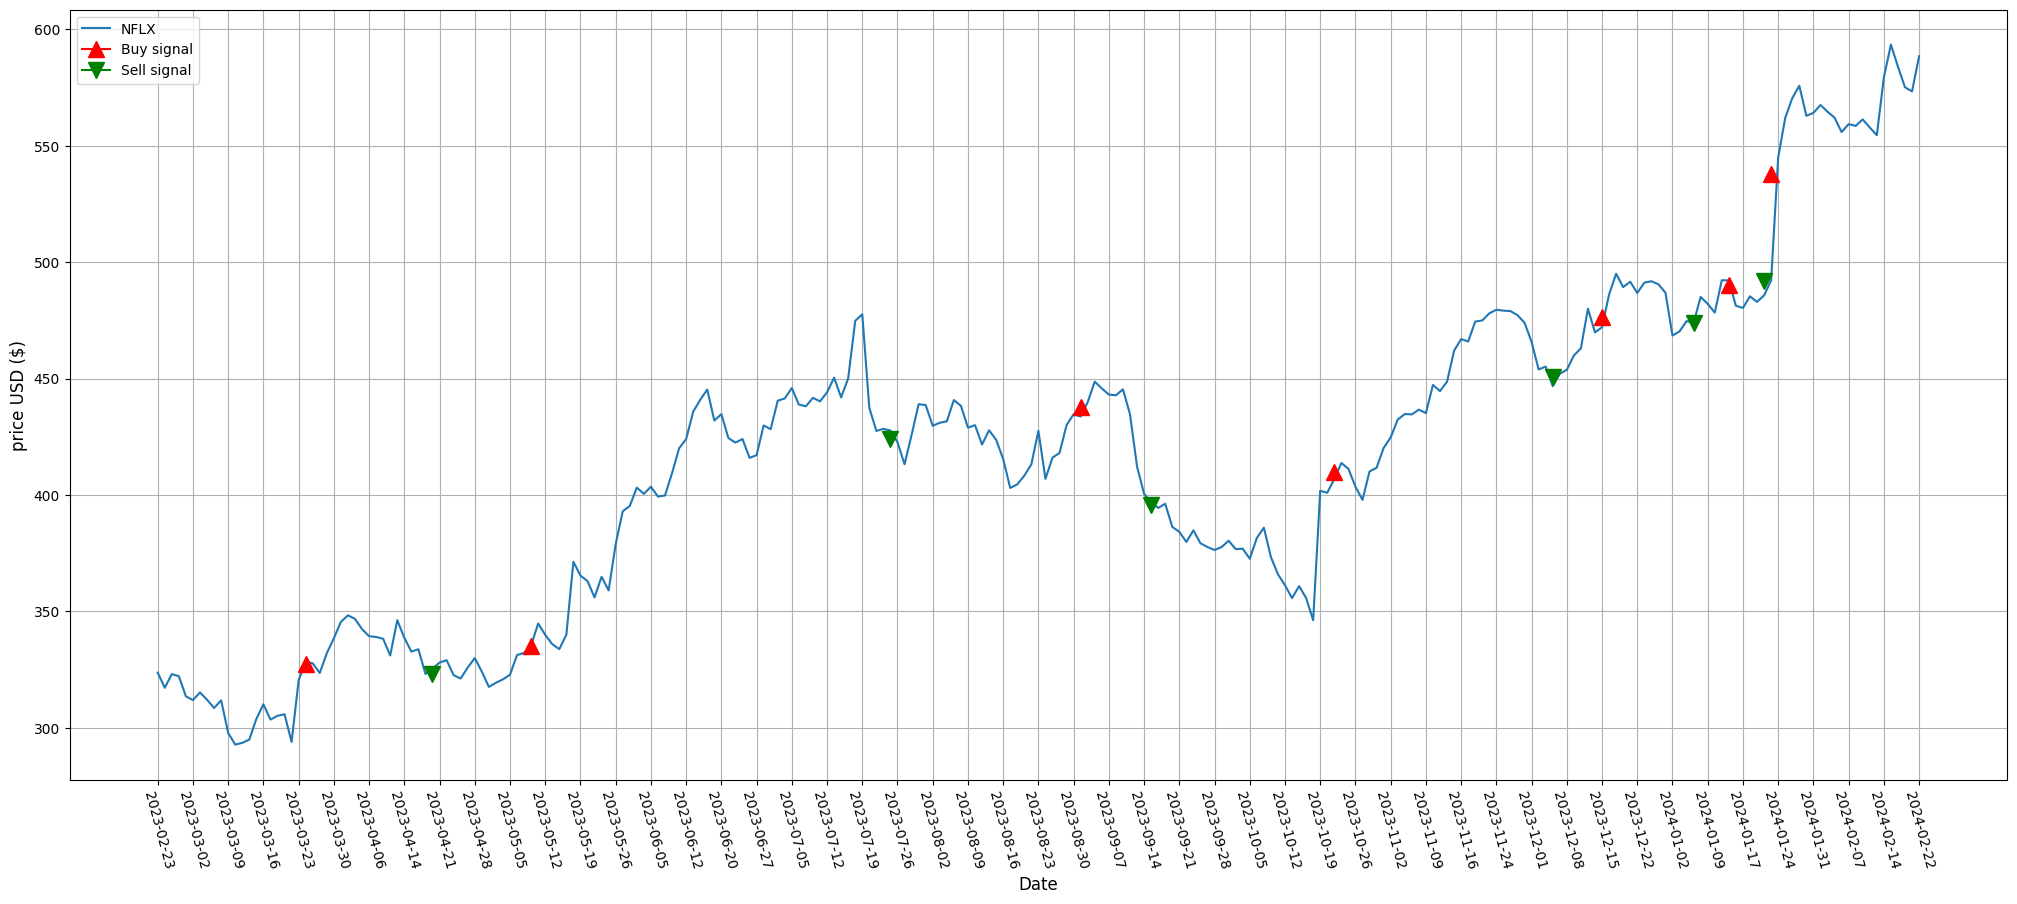

In [4]:
#charting data ------------------------------------------------------------
plt.figure(figsize=(25, 10))
plt.plot(close, label=tickerSymbol)
#plt.plot(x5, label='Close short')
#plt.plot(x20, label='Close long')

plt.plot(df.index,df['pricebuy'].values,color='red',label='Buy signal',marker='^',markersize=12)
plt.plot(df.index,df['pricesell'].values,color='green',label='Sell signal',marker='v',markersize=12)

n = 5  # Adjust n as per your data
plt.xticks(ticks=df.index[::n], labels=df.index[::n])
plt.xticks(rotation=-75)

plt.legend()
plt.xlabel('Date',fontsize=12)
plt.ylabel('price USD ($)',fontsize=12)
plt.grid()

# Part 4— Export results to Excel

In [5]:
#export to excel-------------------------------------------------------------
# work in progress
# adding more functionality 


df.to_excel(current_directory+'/03-output/stock.xlsx', index=True)